# Lab Task: Classification using Neural Networks in PyTorch (Iris Dataset)
### Objective:
In this task, you will build a neural network for classifying the Iris dataset. The task is divided into five clear parts.

## Dataset:
You will use the **Iris dataset** (available in `sklearn.datasets`). It has 4 features:
- `sepal length`
- `sepal width`
- `petal length`
- `petal width`

And 3 target classes:
- Setosa (0)
- Versicolour (1)
- Virginica (2)

## PART 1: Data Preprocessing

Perform the following steps:
1. Load the dataset using `sklearn.datasets.load_iris()`.
2. Convert it to a Pandas DataFrame.
3. Shuffle the dataset.
4. Check for missing values.
5. Normalize the feature columns using `StandardScaler`.
6. Split the data into **80% training** and **20% testing**.
7. Convert the data into PyTorch tensors.

In [48]:
# TODO BY STUDENTS: Import required libraries

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [49]:
# TODO: Preprocess the Iris dataset step-by-step

# load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target # the target variable is extracted and assigned to the variable y

# convert to dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# shuffle the dataset
dfshuffled = df.sample(frac=1, random_state=42).reset_index(drop=True) # frac=1 means all rows are included in the shuffle, random_state=42 ensures the shuffle is reproducible, reset_index resets the row index after shuffling

# check for missing values
print("Missing values in the dataset:")
print(dfshuffled.isna().sum())

# separate features and target
X = dfshuffled.drop('target', axis=1).values
y = dfshuffled['target'].values

# normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # splits the data into training and testing sets, 80% of the data is used for training and 20% for testing, random_state=42 ensures consistent splitting for reproducibility

# convert to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train) # FloatTensor is suitable for numerical computations in PyTorch
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train) # LongTensor used for representing integer labels or classes
y_test_tensor = torch.LongTensor(y_test)


Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Feedforward Neural Network

Build a PyTorch neural network with the following architecture:

- Input Layer: 4 neurons
- Hidden Layer 1: 10 neurons + ReLU
- Output Layer: 3 neurons (no activation here, handled by loss function)

Use `nn.CrossEntropyLoss()` as the loss function.

In [50]:
# model with architecture

class Net(nn.Module): # python class called Net, which inherits from nn.Module
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # takes 4 input features and connects them to 10 neurons in the hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # takes the 10 outputs from the hidden layer and connects them to 3 output neurons

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_1 = Net()

## PART 2: Modify Architecture

Update your model as follows:
- Input Layer: 4 neurons (unchanged)
- Hidden Layer 1: 16 neurons + ReLU
- Hidden Layer 2: 8 neurons + ReLU
- Output Layer: 3 neurons

In [51]:
# TODO: Modify model to have two hidden layers
class NetModified(nn.Module):
    def __init__(self):
        super(NetModified, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # creates the first hidden layer, a fully connected layer with 4 input neurons and 16 output neuron
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)  # second hidden layer with 8 neurons
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(8, 3)   # output layer with 3 neurons representing the classes

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

model_2 = NetModified()

## PART 3: Apply Optimizer and Train models

Use the following settings:
- Optimizer: **Adam**
- Learning Rate: `0.01`
- Number of Epochs: `300`

Train the updated model and log loss.

Model 1 - Epoch [50/300], Loss: 0.2473
Model 1 - Epoch [100/300], Loss: 0.1055
Model 1 - Epoch [150/300], Loss: 0.0708
Model 1 - Epoch [200/300], Loss: 0.0581
Model 1 - Epoch [250/300], Loss: 0.0516
Model 1 - Epoch [300/300], Loss: 0.0475


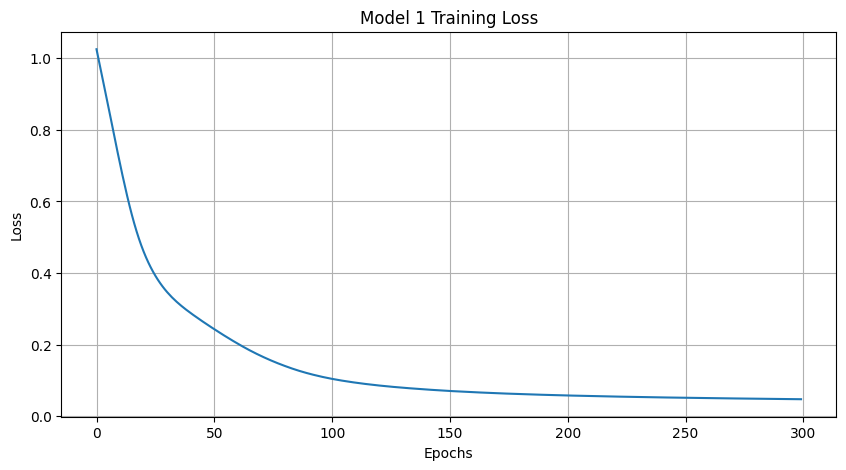

In [52]:
# TODO: Train the model and plot loss (for model_1)

# Your code here

criterion = nn.CrossEntropyLoss() # loss function, nn.CrossEntropyLoss is commonly used for multi-class classification problems
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.01) # optim.Adam is a popular optimization algorithm, model_1.parameters() specifies the parameters to be optimized, and lr=0.01 sets the learning rate

losses_1 = []
epochs = 300

for epoch in range(epochs):

    # forward pass
    outputs = model_1(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # backward pass and optimization
    optimizer_1.zero_grad() # resets the gradients of the optimizer to zero
    loss.backward()
    optimizer_1.step()

    losses_1.append(loss.item())

    if (epoch + 1) % 50 == 0: # prints the loss every 50 epochs to monitor the training
        print(f'Model 1 - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# plot the loss curve for model_1

plt.figure(figsize=(10, 5))
plt.plot(losses_1)
plt.title('Model 1 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Model 2 - Epoch [50/300], Loss: 0.1369
Model 2 - Epoch [100/300], Loss: 0.0480
Model 2 - Epoch [150/300], Loss: 0.0401
Model 2 - Epoch [200/300], Loss: 0.0368
Model 2 - Epoch [250/300], Loss: 0.0352
Model 2 - Epoch [300/300], Loss: 0.0340


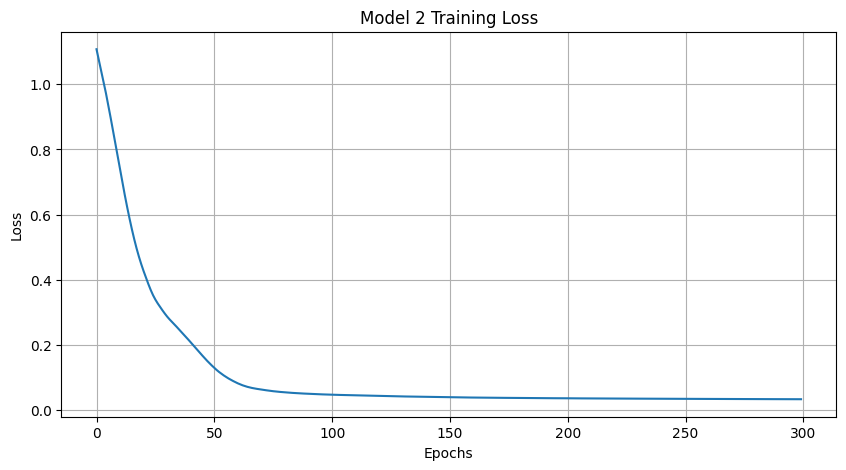

In [53]:
# TODO: Train the model and plot loss (for model_2)

# Your code here
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.01)
losses_2 = []

for epoch in range(epochs):
    # forward pass
    outputs = model_2(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # backward pass and optimization
    optimizer_2.zero_grad()
    loss.backward()
    optimizer_2.step()

    losses_2.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Model 2 - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# plot the loss curve for model_2

plt.figure(figsize=(10, 5))
plt.plot(losses_2)
plt.title('Model 2 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


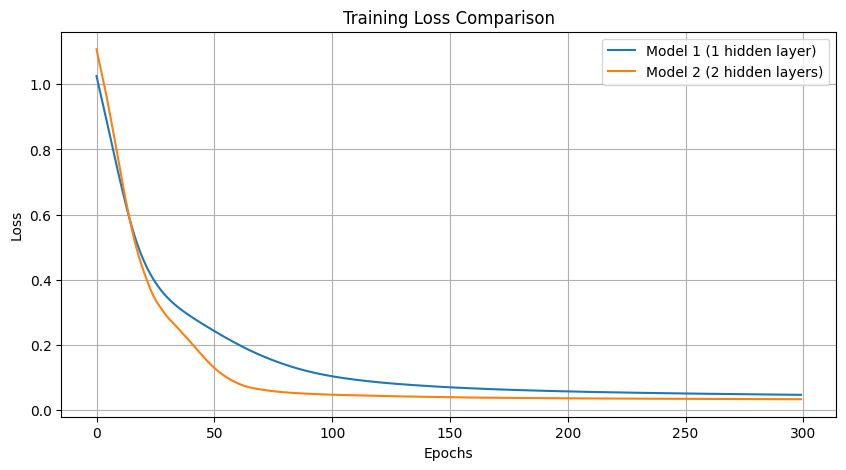

In [54]:
# plot both models' losses for comparison

plt.figure(figsize=(10, 5))
plt.plot(losses_1, label='Model 1 (1 hidden layer)')
plt.plot(losses_2, label='Model 2 (2 hidden layers)')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation of the Models

### **For model_1**


Model 1 Evaluation:
Accuracy: 1.0000
Confusion Matrix:
[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


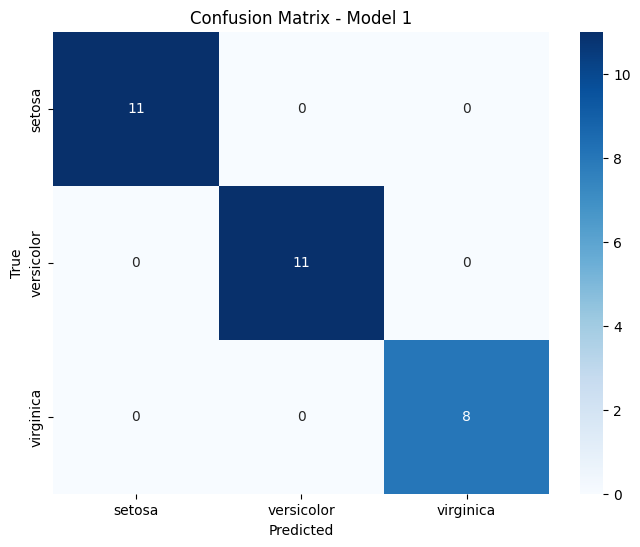

In [55]:
# TODO: Predict and calculate accuracy
# your code here

# evaluation of Model 1

model_1.eval() # sets the model to evaluation mode
with torch.no_grad():
    outputs_1 = model_1(X_test_tensor)
    _, predicted_1 = torch.max(outputs_1.data, 1) # torch.max finds the index of the highest value along dimension 1

accuracy_1 = accuracy_score(y_test, predicted_1.numpy()) # accuracy_score and confusion_matrix is a function from sklearn.metrics
conf_matrix_1 = confusion_matrix(y_test, predicted_1.numpy())

print("\nModel 1 Evaluation:")
print(f"Accuracy: {accuracy_1:.4f}")
print("Confusion Matrix:")
print(conf_matrix_1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 1')
plt.show()


### **For model_2**


Model 2 Evaluation:
Accuracy: 0.9667
Confusion Matrix:
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


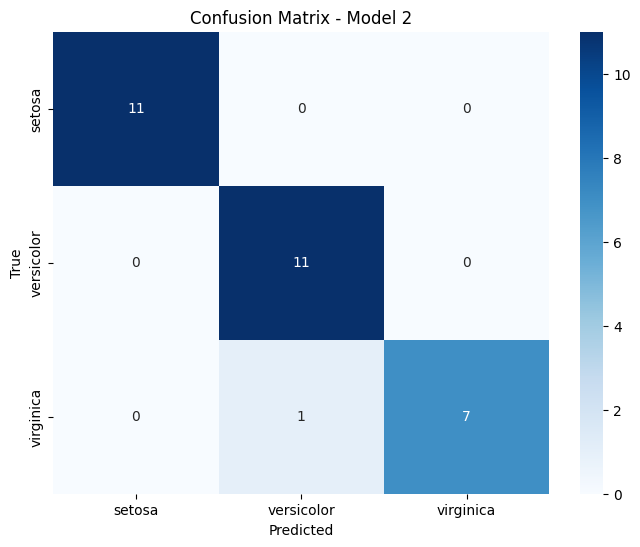

In [56]:
# TODO: Predict and calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

# your code here
# evaluation of Model 2

model_2.eval()
with torch.no_grad():
    outputs_2 = model_2(X_test_tensor)
    _, predicted_2 = torch.max(outputs_2.data, 1)

accuracy_2 = accuracy_score(y_test, predicted_2.numpy())
conf_matrix_2 = confusion_matrix(y_test, predicted_2.numpy())

print("\nModel 2 Evaluation:")
print(f"Accuracy: {accuracy_2:.4f}")
print("Confusion Matrix:")
print(conf_matrix_2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Model 2')
plt.show()
